Bài toán: Dự đoán độ tin cậy và tính hợp lệ của phân tích chi phí bệnh viện với mạng nơ-ron động và thuật toán di truyền

Khai báo thư viện 

In [2]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 2.1 MB/s 


In [3]:
import pandas as pd
import numpy as np
import pygad
import pygad.nn
import pygad.gann

Đọc dữ liệu

In [4]:
# Preparing the NumPy array of the inputs.
data_inputs = np.array(pd.read_excel("/content/drive/MyDrive/data_chuanhoa_input.xlsx"))

# Preparing the NumPy array of the outputs.
data_outputs = np.array(pd.read_excel("/content/drive/MyDrive/data_chuanhoa_output.xlsx"))
data_outputs = data_outputs.reshape(840, )


Xây dựng mô hình

Generation = 1
Fitness    = 77.5
Change     = 77.5
Generation = 2
Fitness    = 77.5
Change     = 0.0
Generation = 3
Fitness    = 77.5
Change     = 0.0
Generation = 4
Fitness    = 77.5
Change     = 0.0
Generation = 5
Fitness    = 77.5
Change     = 0.0
Generation = 6
Fitness    = 77.61904761904762
Change     = 0.1190476190476204
Generation = 7
Fitness    = 77.73809523809524
Change     = 0.1190476190476204
Generation = 8
Fitness    = 77.73809523809524
Change     = 0.0
Generation = 9
Fitness    = 77.73809523809524
Change     = 0.0
Generation = 10
Fitness    = 77.73809523809524
Change     = 0.0
Generation = 11
Fitness    = 77.97619047619048
Change     = 0.2380952380952408
Generation = 12
Fitness    = 77.97619047619048
Change     = 0.0
Generation = 13
Fitness    = 77.97619047619048
Change     = 0.0
Generation = 14
Fitness    = 77.97619047619048
Change     = 0.0
Generation = 15
Fitness    = 78.0952380952381
Change     = 0.1190476190476204
Generation = 16
Fitness    = 78.21428571428571
Change 

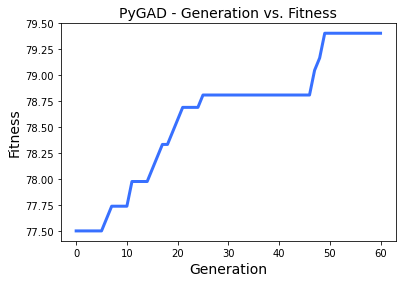

Parameters of the best solution : [-1.57791724e+00 -1.12723635e-01  5.28229699e-02  6.35065501e-02
 -6.69963106e-01 -6.90425587e-03  8.96779202e-02 -7.27468378e-01
  6.09234422e-02  4.14037271e-01 -1.10174445e+00  4.30408174e-02
  2.69834287e-02  7.33806168e-02 -8.00114925e-02 -1.00270571e+00
 -5.47573525e-02  8.57131330e-02 -1.50032982e-02 -7.20588157e-01
 -6.21563852e-01  4.01656111e-02  6.73331423e-03 -1.38522994e+00
  7.46004955e-02 -2.67563470e-01 -8.73620582e-01  7.72310374e-03
 -8.45274595e-02  7.25717539e-01  1.70554951e-02 -3.17823764e-01
  7.95783927e-01 -7.04843496e-01  3.09914442e-02 -1.08372778e+00
 -3.62151962e-01 -1.12141411e+00  3.22754300e-02  1.06602332e+00
  7.65373007e-02 -7.22568309e-01 -1.29996215e+00  2.26739392e-02
  4.57630100e-02 -6.60809713e-01  7.39414166e-02  3.27513783e-02
 -1.03971116e+00  2.56498764e+00 -6.26204820e-01  7.24681605e-01
 -1.47641432e+00  3.66095213e-01 -4.19235277e-01 -4.16928024e-01
  1.11491360e+00 -1.39641265e+00  5.90600323e-01  1.4902

In [5]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs

    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],
                                   data_inputs=data_inputs)
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100

    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance, last_fitness

    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks,
                                                            population_vectors=ga_instance.population)

    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)

    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))
    print("Change     = {change}".format(change=ga_instance.best_solution()[1] - last_fitness))

    last_fitness = ga_instance.best_solution()[1].copy()

# lưu giá trị của fitness thế hệ trước
last_fitness = 0

# Tạo mạng noron
num_solutions = 500 # số giải pháp (nghiệm) của mạng noron 
GANN_instance = pygad.gann.GANN(num_solutions=num_solutions,
                                num_neurons_input= 4,
                                num_neurons_hidden_layers=[16],
                                num_neurons_output= 2,
                                hidden_activations=["relu"],
                                output_activation="softmax")

# trả về danh sách chứa các trọng số cho tất cả giải pháp dưới dạng vecto 
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

#Dân số ban đầu là các vecto trọng số của các giải pháp trong mạng noron
initial_population = population_vectors.copy()

num_parents_mating = 4 # Số lượng cá thể được chọn làm bố mẹ trong nhóm giao phối

num_generations = 60 # Số thế hệ

parent_selection_type = "sss" # phương pháp chọn lọc

crossover_type = "single_point" # phương pháp lai ghép

crossover_probability = 0.95 # xác suất lai ghép

mutation_type = "random" # phương pháp đột biến

mutation_probability = 0.05 # xác suất đột biến

keep_parents = 1 # Number of parents to keep in the next population. -1 có nghĩa là giữ tất cả cha mẹ đang dùng , 0 có nghĩa là không giữ gì ,>0 là giữ nguyên số lượng bố mẹ 

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       crossover_type=crossover_type,
                       crossover_probability=crossover_probability,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       keep_parents=keep_parents,
                       on_generation=callback_generation)

ga_instance.run()

# biểu đồ hàm fitness qua các thế hệ
ga_instance.plot_fitness()

# Xác định thông số của giải pháp tốt nhất
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

if ga_instance.best_solution_generation != -1:
    print("Best fitness value reached after {best_solution_generation} generations.".format(best_solution_generation=ga_instance.best_solution_generation))

# Dự đoán kết quả đầu ra của dữ liệu bằng giải pháp tốt nhất.
predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[solution_idx],
                               data_inputs=data_inputs)
print("Predictions of the trained network : {predictions}".format(predictions=predictions))

# Độ chính xác của mô hình
num_wrong = np.where(predictions != data_outputs)[0]
num_correct = data_outputs.size - num_wrong.size
accuracy = 100 * (num_correct/data_outputs.size)
print("Number of correct classifications : {num_correct}.".format(num_correct=num_correct))
print("Number of wrong classifications : {num_wrong}.".format(num_wrong=num_wrong.size))
print("Classification accuracy : {accuracy}.".format(accuracy=accuracy))

Unnormalized confusion matrix(ma trận confusion chưa chuẩn hóa)

In [6]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(data_outputs, predictions)
print('Confusion matrix:')
print(cnf_matrix)

Confusion matrix:
[[644   4]
 [169  23]]


Normalized confusion matrix(ma trận confusion chuẩn hóa)

In [7]:
normalized_confusion_matrix = cnf_matrix/cnf_matrix.sum(axis = 1, keepdims = True)
print('\nConfusion matrix (with normalizatrion:)')
print(normalized_confusion_matrix)


Confusion matrix (with normalizatrion:)
[[0.99382716 0.00617284]
 [0.88020833 0.11979167]]


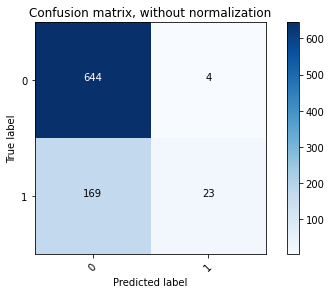

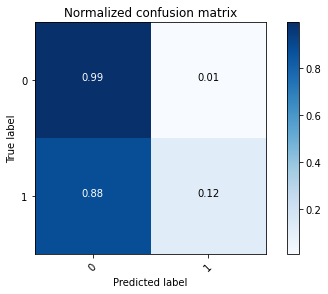

In [8]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

 Precision-recall

In [9]:
r = cnf_matrix[0,0]/np.sum(cnf_matrix[:,0])
p = cnf_matrix[0,0]/np.sum(cnf_matrix[0])
print("precition = {0:.6f}, recall = {1:.6f}".format(p, r))

precition = 0.993827, recall = 0.792128


F1-score

In [10]:
F1_Score = float(2*p*r)/(p + r)
F1_Score

0.8815879534565367